In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_fscore_support

In [4]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


In [5]:
from src.features import build_features
from src.models import predict_model

## Set up data

In [6]:
df_test = pd.read_pickle('data/processed/test_data.pkl')

In [7]:
X_test, y_test = build_features.df_to_arr_clf(df_test)

In [65]:
# Trained pipelines
pl_reg = predict_model.load_pipeline_reg('reg_svr')
pl_clf = predict_model.load_pipeline_clf('clf_svc')

### predict both gas id and concentration. The predicted gas id is used as an input to the regression

In [9]:
y_test_pred = predict_model.predict_gas_conc(X_test, pl_clf, pl_reg)

### Performance of the gas id prediction

In [64]:
precision_recall_fscore_support(df_test.values[:,1], y_test_pred[:,0])

(array([0.99489796, 0.99521531, 0.99346405, 0.9979798 , 0.99318569,
        0.992     ]),
 array([0.99489796, 0.99521531, 0.98701299, 0.99596774, 0.9965812 ,
        0.99465241]),
 array([0.99489796, 0.99521531, 0.99022801, 0.99697275, 0.99488055,
        0.99332443]),
 array([392, 627, 308, 496, 585, 374]))

### Performance of the gas concentration prediction

In [61]:
r2_score(df_test.values[:,2:3], y_test_pred[:,1])

0.9878910364709039

### Goodness of fit

Text(0.5, 1.0, 'Test Set Concentration vs Predicted')

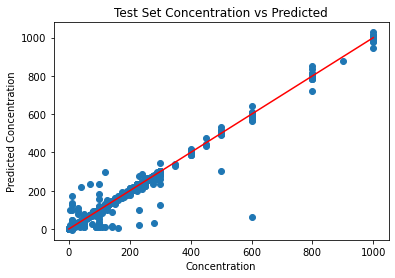

In [35]:
plt.scatter(df_test.Gas_Conc, y_test_pred[:,1])
plt.plot([0,1000],[0,1000], color='red')
plt.xlabel('Concentration')
plt.ylabel('Predicted Concentration')
plt.title('Test Set Concentration vs Predicted')

### Simulate running the model

In [24]:
# Remove the model to return just the trained preprocessing pipeline
pl_process = Pipeline(pl_clf.steps[0:-1])

Select a random test set, plot the actual values and the prediction, and then display a grid of the transformed sensor responses.

y test: [['Ethanol' 100.0]] 

y test pred: [['Ethanol' 101.50537423096802]] 



<AxesSubplot:>

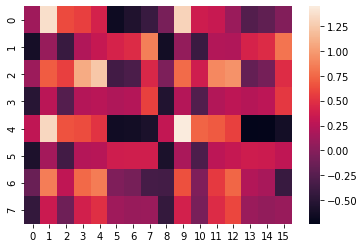

In [49]:
sample = df_test.loc[df_test.Gas_ID == 'Ethanol'].sample(1).values
X_samp = sample[:, 3:]
y_samp = sample[:,1:3]
y_samp_pred = predict_model.predict_gas_conc(X_samp, pl_clf, pl_reg)

X_samp_trans = pl_process.transform(X_samp)
X_samp_grid = X_samp_trans[:,1:].reshape(8,16)

print('y test: {} \n'.format(y_samp))
print('y test pred: {} \n'.format(y_samp_pred))
sns.heatmap(X_samp_grid)